## Importing the necessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
# Load dataset
data = pd.read_csv('heart.csv')


#### Basic information drawn from the dataset

In [2]:
print(data.head())
print("The dataset shape is ",data.shape)


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
The dataset shape is  (918, 12)


In [3]:
print(data['ChestPainType'].value_counts())

data['ExerciseAngina'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [4]:
data['Sex'].value_counts()


Sex
M    725
F    193
Name: count, dtype: int64

In [5]:
data['RestingECG'].value_counts()


RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

### Label encoding

In [6]:
#label encoding
label_encode = LabelEncoder()
columns = ['ST_Slope','ExerciseAngina','ChestPainType','RestingECG', 'Sex' ]
for column in  columns:
    data[column] = label_encode.fit_transform(data[column])

#### statistical Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [8]:
# statistics of the the dataset
data.describe().round(4)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.0000,918.0000,918.0000,918.0000,918.0000,918.0000,918.0000,918.0000,918.0000,918.0000,918.0000,918.0000
mean,53.5109,0.7898,0.7810,132.3965,198.7996,0.2331,0.9891,136.8094,0.4041,0.8874,1.3617,0.5534
std,9.4326,0.4077,0.9565,18.5142,109.3841,0.4230,0.6317,25.4603,0.4910,1.0666,0.6071,0.4974
min,28.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,60.0000,0.0000,-2.6000,0.0000,0.0000
25%,47.0000,1.0000,0.0000,120.0000,173.2500,0.0000,1.0000,120.0000,0.0000,0.0000,1.0000,0.0000
50%,54.0000,1.0000,0.0000,130.0000,223.0000,0.0000,1.0000,138.0000,0.0000,0.6000,1.0000,1.0000
75%,60.0000,1.0000,2.0000,140.0000,267.0000,0.0000,1.0000,156.0000,1.0000,1.5000,2.0000,1.0000
max,77.0000,1.0000,3.0000,200.0000,603.0000,1.0000,2.0000,202.0000,1.0000,6.2000,2.0000,1.0000


In [9]:
data.describe().round(4).T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.5109,9.4326,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.7898,0.4077,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.7810,0.9565,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,132.3965,18.5142,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.7996,109.3841,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.2331,0.4230,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.9891,0.6317,0.0,1.00,1.0,1.0,2.0
MaxHR,918.0,136.8094,25.4603,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.4041,0.4910,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.8874,1.0666,-2.6,0.00,0.6,1.5,6.2


### DATA VISUALIZATION

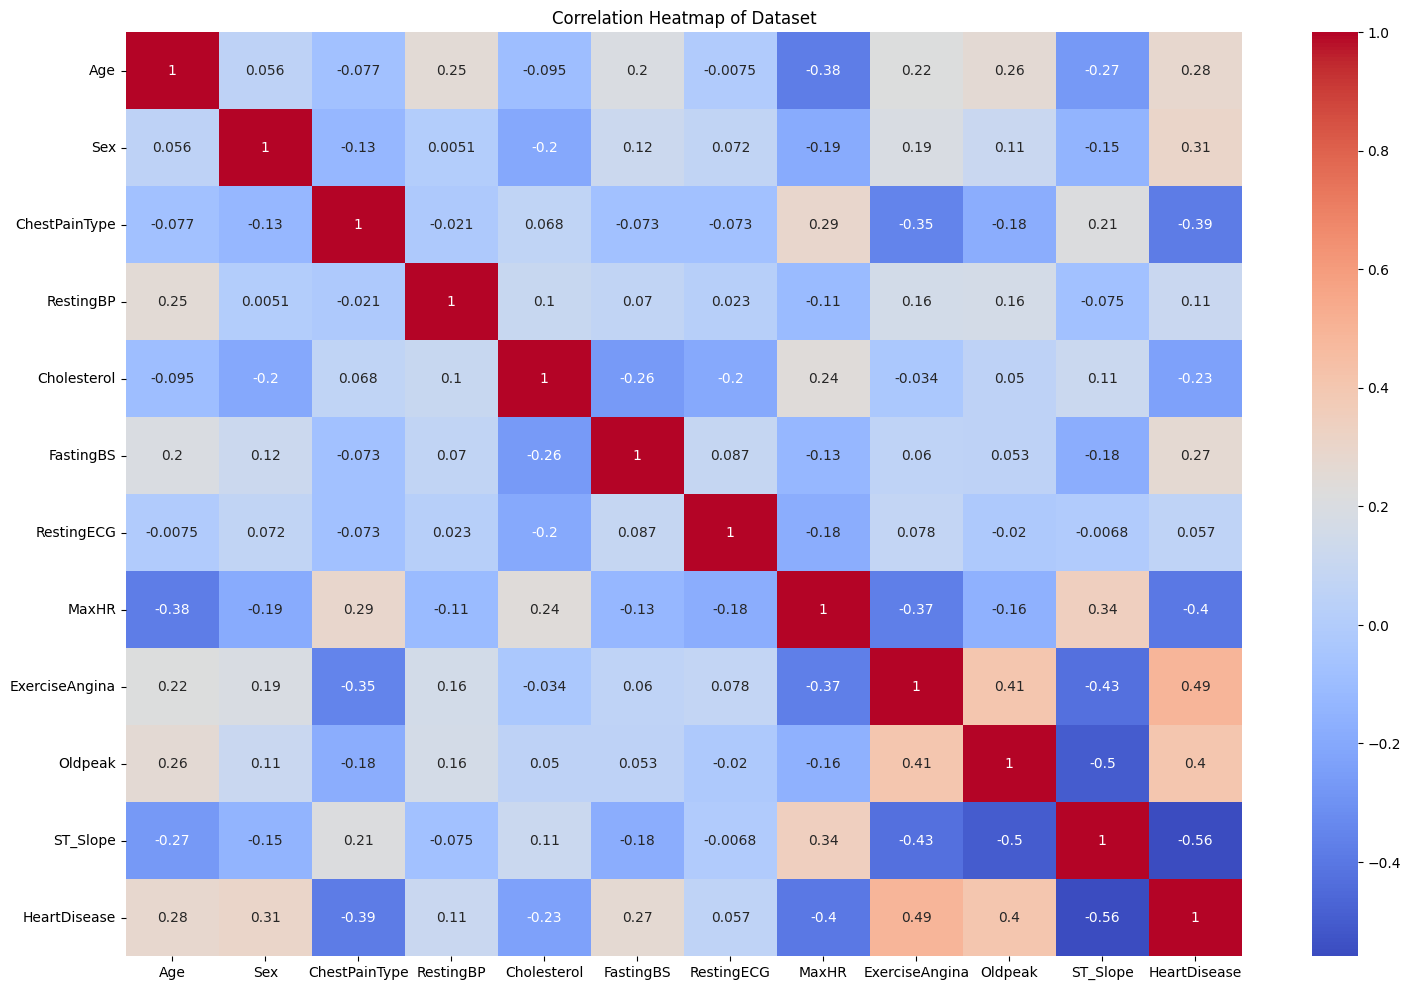

In [10]:

numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap of Dataset")
plt.show()

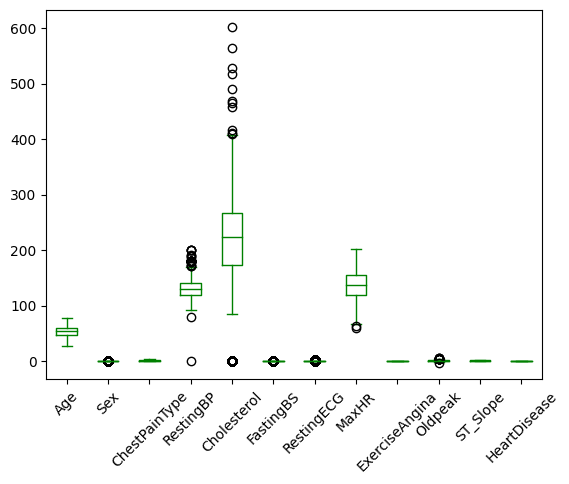

In [11]:
# Plot the boxplot with rotated text labels
data.plot(kind='box', rot=45,color='green')

# Show the plot
plt.show()

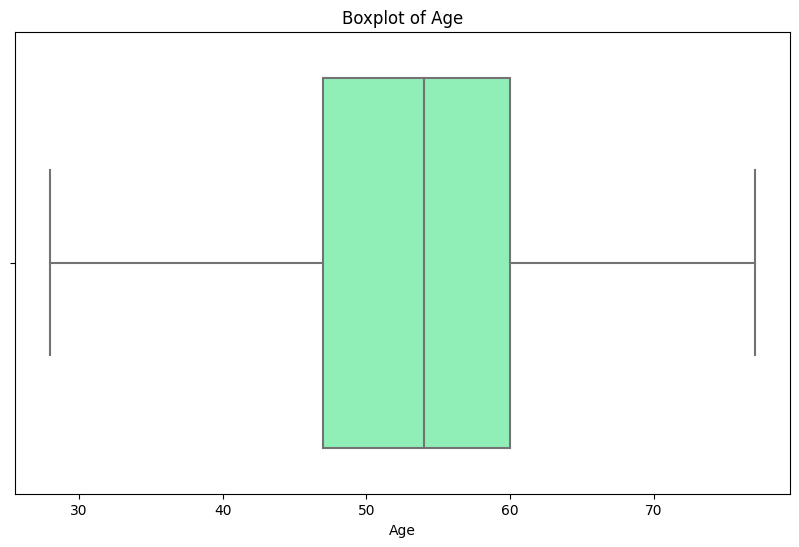

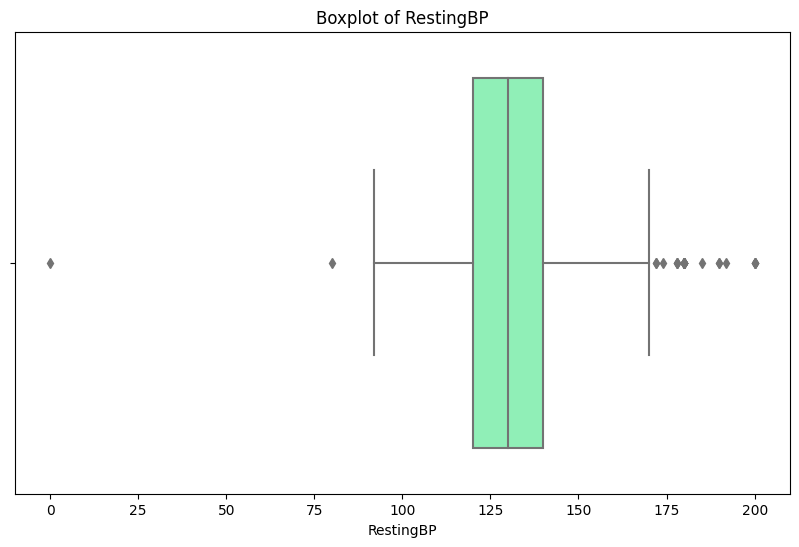

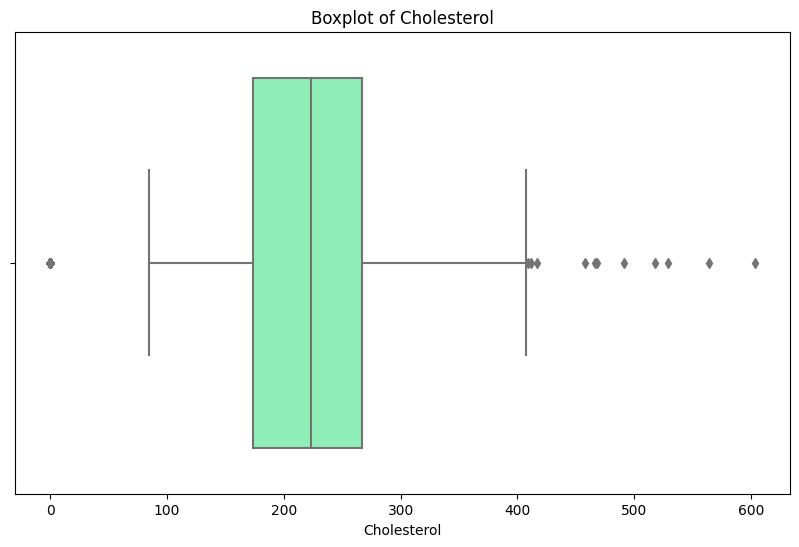

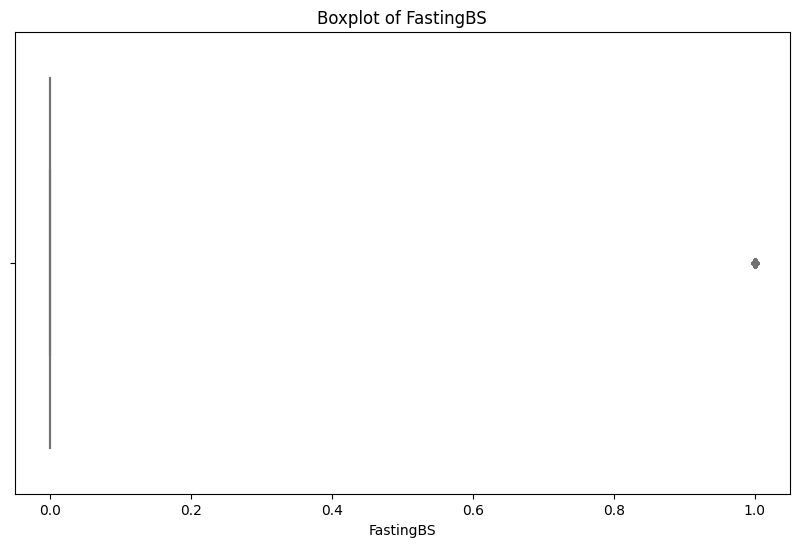

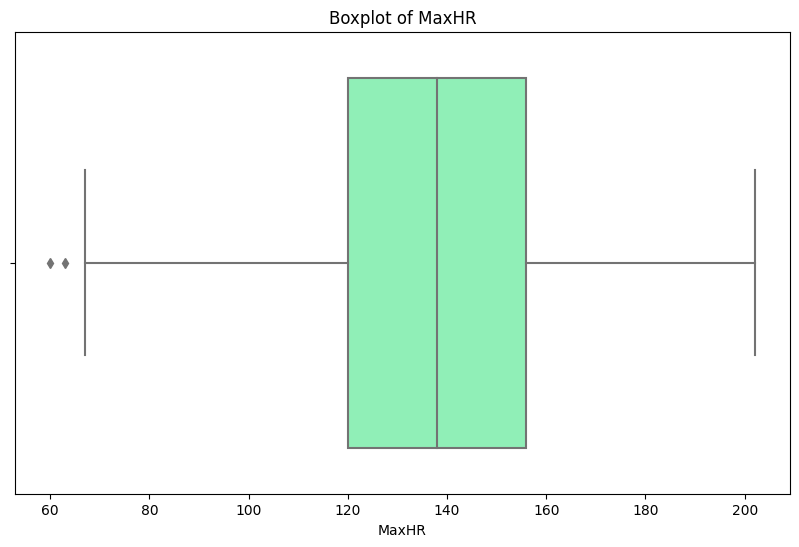

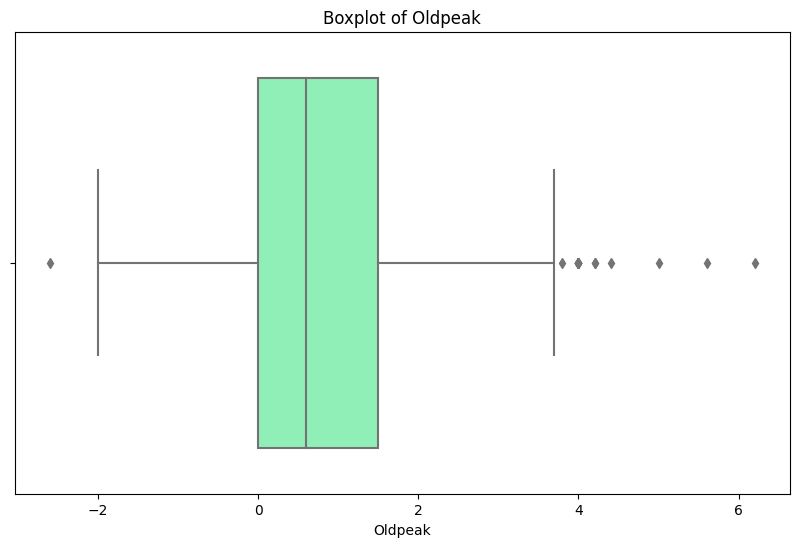

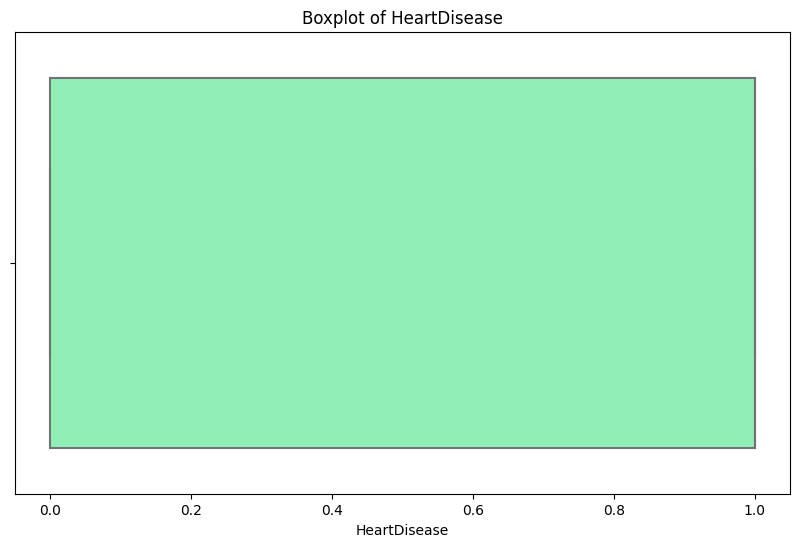

In [12]:
#Filter numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical feature to identify outliers
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()

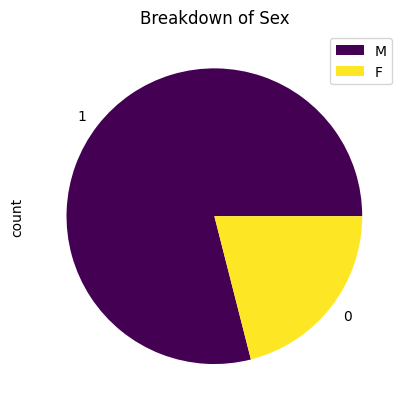

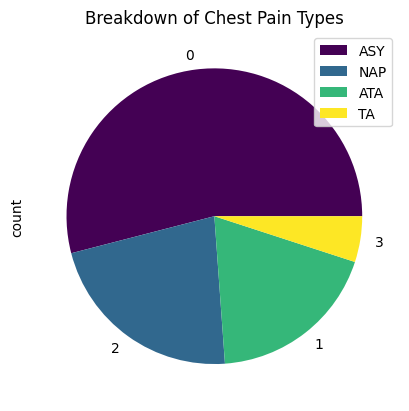

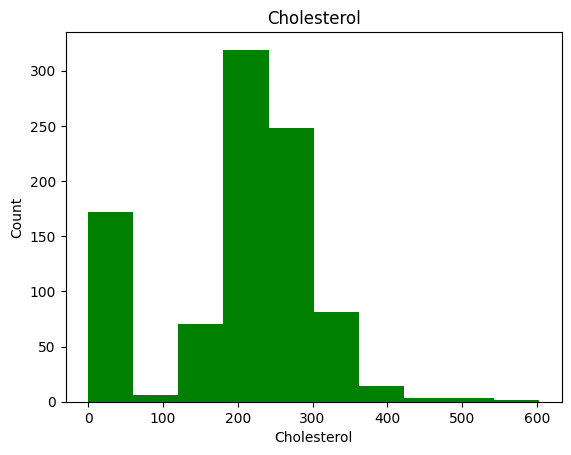

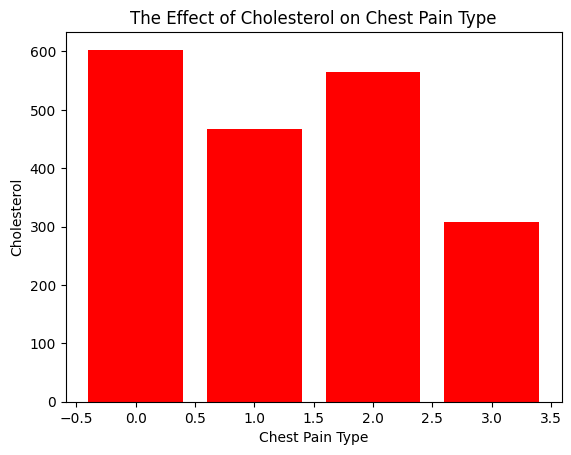

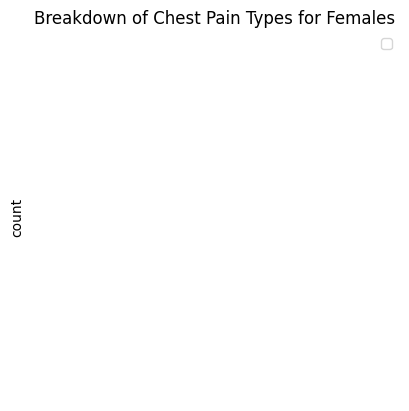

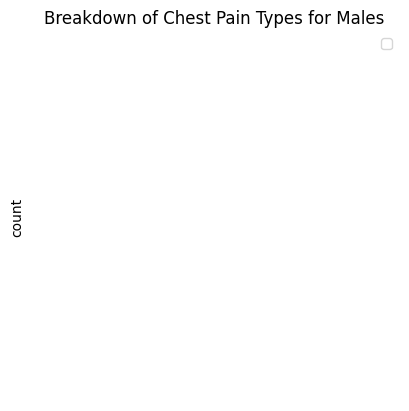

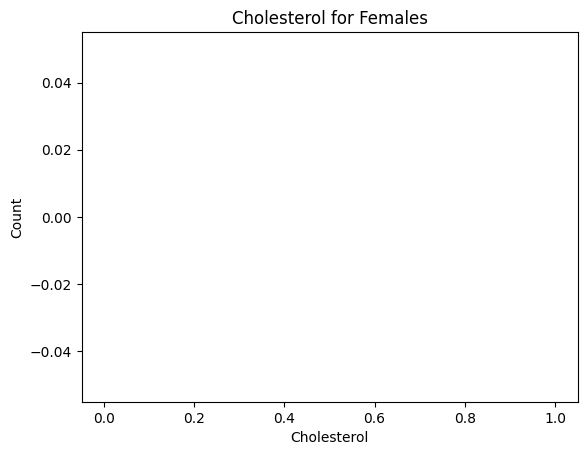

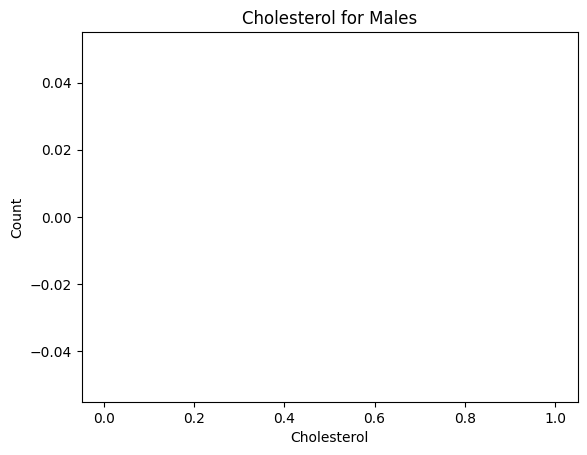

In [13]:
# Sample data
pain = data['ChestPainType']
cholesterol = data['Cholesterol']
sex = data['Sex']

# Visualizations with "viridis" colormap
sex.value_counts().plot(kind='pie', colormap='viridis')
plt.title("Breakdown of Sex")
plt.legend(['M','F'])
plt.show()

pain.value_counts().plot(kind='pie', colormap='viridis')
plt.title("Breakdown of Chest Pain Types")
plt.legend(['ASY','NAP', 'ATA', 'TA'])
plt.show()
plt.hist(cholesterol, color='green')
plt.title('Cholesterol')
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()

plt.bar(pain, cholesterol, color='red')
plt.title('The Effect of Cholesterol on Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel("Cholesterol")
plt.show()

just_F = data[data['Sex']== 'F']
just_M = data[data['Sex']== 'M']
F_pain = just_F['ChestPainType']
M_pain = just_M['ChestPainType']

F_cholesterol = just_F['Cholesterol']
M_cholesterol = just_M['Cholesterol']

F_pain.value_counts().plot(kind='pie', colormap='viridis')
plt.title("Breakdown of Chest Pain Types for Females")
plt.legend(['ASY','ATA', 'NAP', 'TA'])
plt.show()

M_pain.value_counts().plot(kind='pie', colormap='viridis')
plt.title("Breakdown of Chest Pain Types for Males")
plt.legend(['ASY','NAP', 'ATA', 'TA'])
plt.show()

plt.hist(F_cholesterol, color='green')
plt.title('Cholesterol for Females')
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()

plt.hist(M_cholesterol, color='green')
plt.title('Cholesterol for Males')
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()

### Splitting the Dataset

In [14]:
#splitting the features and target
x = data.drop(columns="HeartDisease", axis=1)
y = data['HeartDisease']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#### the models

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# List of models to train
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Train and evaluate each model
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))


C:\Users\Masterkim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        77
           1       0.90      0.82      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

Decision Tree Accuracy: 0.7989130434782609
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        77
           1       0.87      0.77      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.80       184

Random Forest Accuracy: 0.8913043478260869
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        77
           1       0.93      0.88      0.90       107

    accuracy                           0.89     

### INfERENCE
#### the accuracies of Random Forest, Logistic Regression and Gboost are the best

In [17]:
print("the end ")

the end 
